Importing Libraries:

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mounting Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Datasets:

In [ ]:
data_matches = pd.read_csv('/content/drive/MyDrive/Sem3/DS203/Project/IPL Matches 2008-2020.csv')
data_matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
data_balls = pd.read_csv('/content/drive/MyDrive/Sem3/DS203/Project/IPL Ball-by-Ball 2008-2020.csv')
data_balls.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
data = pd.merge(left = data_matches, right = data_balls, on='id', how = 'right')
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193468 entries, 0 to 193467
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                193468 non-null  int64  
 1   city              190329 non-null  object 
 2   date              193468 non-null  object 
 3   player_of_match   193096 non-null  object 
 4   venue             193468 non-null  object 
 5   neutral_venue     193468 non-null  int64  
 6   team1             193468 non-null  object 
 7   team2             193468 non-null  object 
 8   toss_winner       193468 non-null  object 
 9   toss_decision     193468 non-null  object 
 10  winner            193096 non-null  object 
 11  result            193096 non-null  object 
 12  result_margin     189871 non-null  float64
 13  eliminator        193096 non-null  object 
 14  method            3208 non-null    object 
 15  umpire1           193468 non-null  object 
 16  umpire2           19

# Batting Analysis

Most Runs by a Batsman across the years

In [ ]:
temp_df = data_balls.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False)
temp_df.head(10)

batsman
V Kohli           5878
SK Raina          5368
DA Warner         5254
RG Sharma         5230
S Dhawan          5197
AB de Villiers    4849
CH Gayle          4772
MS Dhoni          4632
RV Uthappa        4607
G Gambhir         4217
Name: batsman_runs, dtype: int64

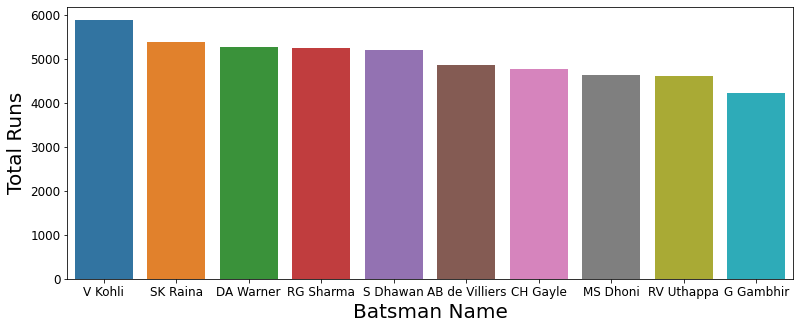

In [ ]:
plt.figure(figsize=(13,5))
sns.barplot(y=temp_df[:10],x=temp_df[:10].index)
plt.xlabel('Batsman Name',fontsize=20)
plt.ylabel('Total Runs',fontsize=20)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

Most Sixes by a batsman

In [ ]:
temp_df = data_balls[data_balls['batsman_runs']==6].groupby(['batsman'])['batsman_runs'].count().sort_values(ascending=False)
temp_df.head(10)

batsman
CH Gayle          349
AB de Villiers    235
MS Dhoni          216
RG Sharma         214
V Kohli           202
KA Pollard        198
DA Warner         195
SK Raina          194
SR Watson         190
RV Uthappa        163
Name: batsman_runs, dtype: int64

Text(0, 0.5, 'Number of Sixes')

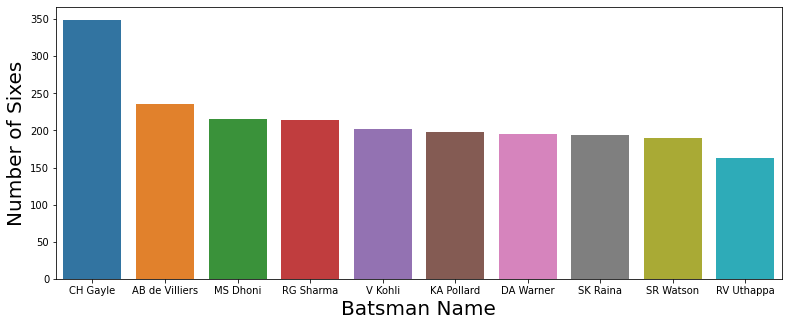

In [ ]:
plt.figure(figsize=(13,5))
sns.barplot(y=temp_df[:10],x=temp_df[:10].index)
plt.xlabel('Batsman Name',fontsize=20)
plt.ylabel('Number of Sixes',fontsize=20)

Most Sixes in an innings

In [ ]:
temp_df = data[data['batsman_runs']==6].groupby(['date','batsman'])['batsman_runs'].count().sort_values(ascending=False)
temp_df.head(10)

date        batsman       
2013-04-23  CH Gayle          17
2008-04-18  BB McCullum       13
2012-05-17  CH Gayle          13
2015-05-06  CH Gayle          12
2016-05-14  AB de Villiers    12
2018-04-10  AD Russell        11
2010-04-03  M Vijay           11
2018-04-19  CH Gayle          11
2008-05-14  ST Jayasuriya     11
2018-04-15  SV Samson         10
Name: batsman_runs, dtype: int64

Most Centuries

In [ ]:
temp_df1 = data.groupby(['date','batsman'])['batsman_runs'].sum()
temp_df = temp_df1[temp_df1>=100].groupby('batsman').count().sort_values(ascending=False)
temp_df.head(10)

batsman
CH Gayle          6
V Kohli           5
SR Watson         4
DA Warner         4
AB de Villiers    3
BA Stokes         2
S Dhawan          2
M Vijay           2
HM Amla           2
BB McCullum       2
Name: batsman_runs, dtype: int64

Text(0, 0.5, 'No. of centuries')

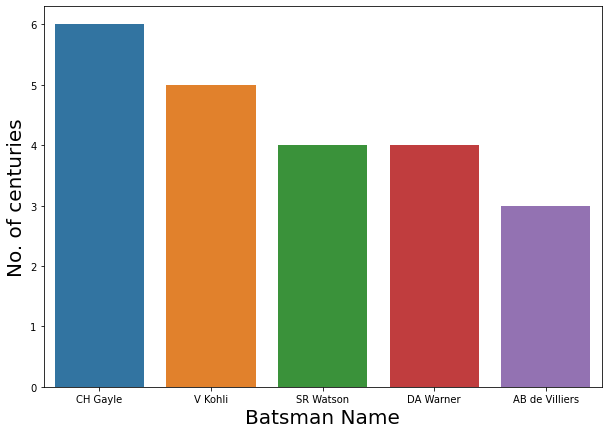

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(y=temp_df[:5],x=temp_df[:5].index)
plt.xlabel('Batsman Name',fontsize=20)
plt.ylabel('No. of centuries',fontsize=20)

Most Half Centuries

In [ ]:
temp_df1 = data.groupby(['date','batsman'])['batsman_runs'].sum()
temp_df = temp_df1[temp_df1>=50].groupby('batsman').count().sort_values(ascending=False)
temp_df.head(10)

batsman
DA Warner         52
V Kohli           44
S Dhawan          43
AB de Villiers    41
RG Sharma         40
SK Raina          39
CH Gayle          37
G Gambhir         36
AM Rahane         30
SR Watson         25
Name: batsman_runs, dtype: int64

Text(0, 0.5, 'Number of Half Centuries')

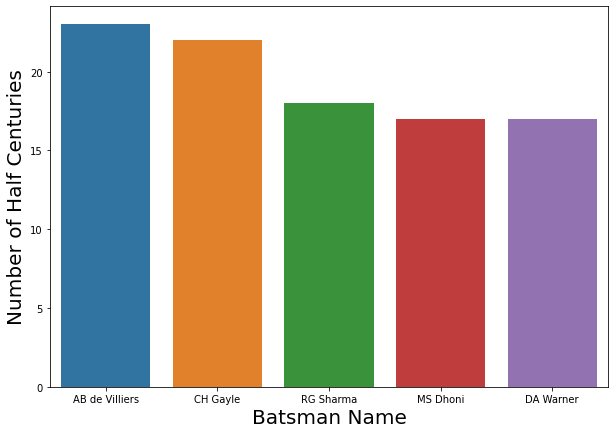

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(y=temp_df[:5],x=temp_df[:5].index)
plt.xlabel('Batsman Name',fontsize=20)
plt.ylabel('Number of Half Centuries',fontsize=20)

In [ ]:
data['season']=data['date'].str[:4]
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008


Orange cap Winners (Most runs in a particular season)

In [ ]:
temp_df = data.groupby(['season','batsman'])['batsman_runs'].sum().groupby(['season']).max()
temp_df1 = pd.DataFrame(data.groupby(['season','batsman'])['batsman_runs'].sum())
for season,batsman_runs in temp_df.items():
  player = temp_df1.loc[season][temp_df1.loc[season]['batsman_runs'] == batsman_runs].index[0]
  print(str(season)+'\t'+str(player)+'\t'+str(batsman_runs))


2008	SE Marsh	616
2009	ML Hayden	572
2010	SR Tendulkar	618
2011	CH Gayle	608
2012	CH Gayle	733
2013	MEK Hussey	733
2014	RV Uthappa	660
2015	DA Warner	562
2016	V Kohli	973
2017	DA Warner	641
2018	KS Williamson	735
2019	DA Warner	692
2020	KL Rahul	670


Highest individual Score in an innings

In [ ]:
temp_df = data.groupby(['date','batsman'])['batsman_runs'].sum().sort_values(ascending=False)
temp_df.head(10)

date        batsman       
2013-04-23  CH Gayle          175
2008-04-18  BB McCullum       158
2015-05-10  AB de Villiers    133
2020-09-24  KL Rahul          132
2016-05-14  AB de Villiers    129
2012-05-17  CH Gayle          128
2018-05-10  RR Pant           128
2010-04-03  M Vijay           127
2017-04-30  DA Warner         126
2014-05-30  V Sehwag          122
Name: batsman_runs, dtype: int64

Most 4s by a batsman

In [ ]:
temp_df = data_balls[data_balls['batsman_runs']==4].groupby(['batsman'])['batsman_runs'].count().sort_values(ascending=False)
temp_df.head(10)

batsman
S Dhawan          591
DA Warner         510
V Kohli           504
SK Raina          493
G Gambhir         492
RG Sharma         458
RV Uthappa        454
AM Rahane         416
AB de Villiers    390
CH Gayle          384
Name: batsman_runs, dtype: int64

Text(0, 0.5, 'Total Runs')

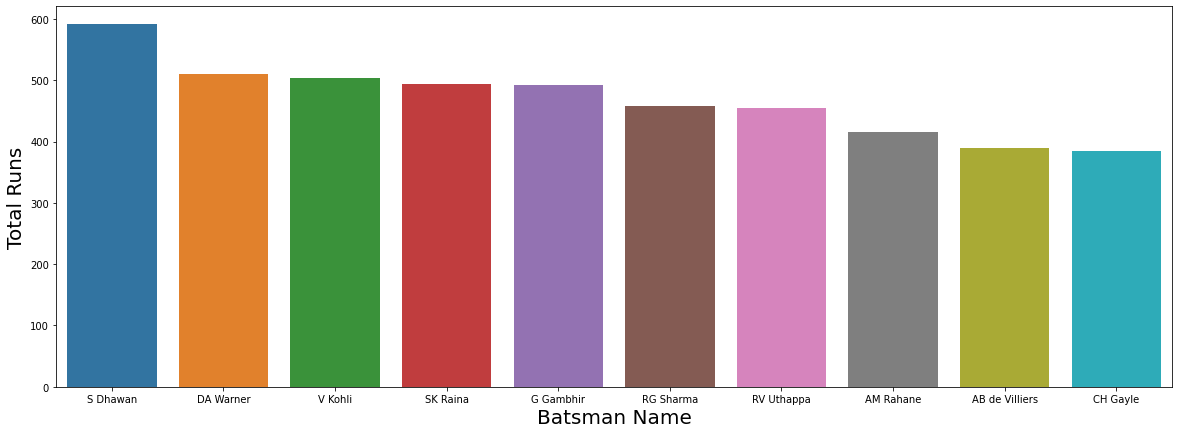

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(y=temp_df[:10],x=temp_df[:10].index)
plt.xlabel('Batsman Name',fontsize=20)
plt.ylabel('Total Runs',fontsize=20)

In [ ]:
temp_df = data[data['batsman_runs']==4].groupby(['date','batsman'])['batsman_runs'].count().sort_values(ascending=False)
temp_df.head(10)

date        batsman       
2015-05-10  AB de Villiers    19
2011-04-13  PC Valthaty       19
2012-04-06  AM Rahane         16
2010-04-07  MJ Lumb           16
2017-05-10  SS Iyer           15
2018-05-10  RR Pant           15
2016-04-17  Q de Kock         15
2012-05-25  M Vijay           15
2014-04-18  GJ Maxwell        15
2020-10-25  BA Stokes         14
Name: batsman_runs, dtype: int64

Hard-Hitting Ability which is calculated as: (Fours +Sixes)/Number of Balls


In [ ]:
Fours = pd.DataFrame(data_balls[data_balls['batsman_runs']==4].groupby(['batsman'])['batsman_runs'].count())
Sixes = pd.DataFrame(data_balls[data_balls['batsman_runs']==6].groupby(['batsman'])['batsman_runs'].count())
Balls = pd.DataFrame(data_balls.groupby(['batsman'])['ball'].count())
Four_Six = pd.merge(left = Fours, right = Sixes, on='batsman', how = 'right')
Four_Six = pd.merge(left = Four_Six, right = Balls, on='batsman', how = 'right')
Four_Six.columns = ['Fours','Sixes','Balls']
Four_Six['Hard Hitting Ability']=(Four_Six['Fours']+Four_Six['Sixes'])/Four_Six['Balls']
Four_Six=Four_Six.fillna(0)
Four_Six = Four_Six[Four_Six['Balls']>=50] 
Four_Six = pd.DataFrame(Four_Six['Hard Hitting Ability'].sort_values(ascending=False))
Four_Six.head(10)

,Hard Hitting Ability
batsman,
LJ Wright,0.301587
SP Narine,0.270506
Kamran Akmal,0.269231
AD Russell,0.265306
MJ Lumb,0.257576
AC Blizzard,0.252747
KK Cooper,0.242857
V Sehwag,0.240044
BCJ Cutting,0.232877


Finishing Ability calculated as Not out Innings/Total Innings

In [ ]:
out_in = data[data['is_wicket']==1].groupby(['batsman'])['date'].count()
tot_in = data.groupby('batsman')['date'].count()
nout_in = tot_in - out_in
Finish = nout_in/tot_in
Finish=Finish.fillna(0)
Finish=pd.DataFrame(Finish.sort_values(ascending=False))
Finish.columns = ['Finishing Ability']
Finish.head(10)

,Finishing Ability
batsman,
Iqbal Abdulla,0.988372
RD Gaikwad,0.982659
MN van Wyk,0.977778
PD Collingwood,0.974843
PV Tambe,0.974359
B Sumanth,0.973684
DJ Harris,0.970874
JP Duminy,0.970833
LMP Simmons,0.969248


# Bowling Analysis

Most Wickets in IPL Career

In [ ]:
temp_df = data[(data['dismissal_kind']!='run out') & (data['dismissal_kind'].notnull())].groupby(['bowler']).count()['ball'].sort_values(ascending=False)
temp_df.head(10)

bowler
SL Malinga         170
A Mishra           160
PP Chawla          156
DJ Bravo           153
Harbhajan Singh    150
R Ashwin           138
B Kumar            136
SP Narine          127
YS Chahal          121
UT Yadav           119
Name: ball, dtype: int64

Text(0, 0.5, 'Number of Wickets')

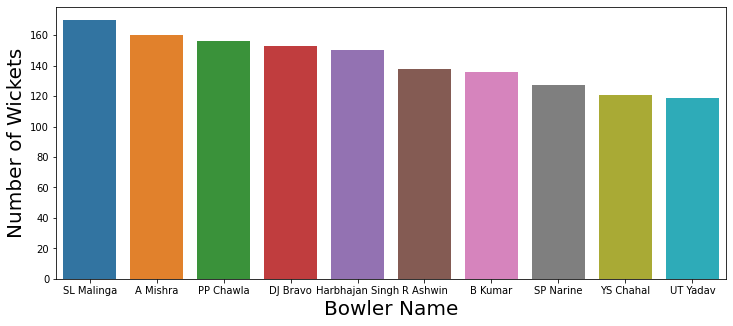

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(y=temp_df[:10],x=temp_df[:10].index)
plt.xlabel('Bowler Name',fontsize=20)
plt.ylabel('Number of Wickets',fontsize=20)

Least and Most Runs Conceded in an inning by a bowler

In [ ]:
temp_df=data.groupby(['bowler','date'])['batsman_runs'].sum().sort_values(ascending=True)
temp_df.head(10)

bowler        date      
DP Nannes     2011-04-12    0
Z Khan        2015-05-17    0
SK Raina      2010-04-22    0
JM Kemp       2010-03-21    0
RA Jadeja     2008-05-30    0
SK Raina      2011-05-09    0
AC Gilchrist  2013-05-18    0
DJ Bravo      2019-03-23    0
YS Chahal     2019-04-30    0
JP Duminy     2012-04-22    0
Name: batsman_runs, dtype: int64

In [ ]:
temp_df=data.groupby(['bowler','date'])['batsman_runs'].sum().sort_values(ascending=False)
temp_df.head(10)

bowler            date      
Basil Thampi      2018-05-17    69
UT Yadav          2013-05-10    64
I Sharma          2013-05-08    63
S Kaul            2020-10-04    62
MG Neser          2013-05-06    61
AB Dinda          2013-04-13    61
Sandeep Sharma    2014-05-14    61
VR Aaron          2012-05-25    60
Imran Tahir       2016-05-15    59
Mujeeb Ur Rahman  2019-04-29    59
Name: batsman_runs, dtype: int64

Purple Cap Winners

In [ ]:
temp_df = data[(data['dismissal_kind']!='run out') & (data['dismissal_kind'].notnull())].groupby(['season','bowler']).count()['ball'].groupby(['season']).max()
temp_df1 = pd.DataFrame(data[(data['dismissal_kind']!='run out') & (data['dismissal_kind'].notnull())].groupby(['season','bowler']).count()['ball'])
for season,wicket in temp_df.items():
  player = temp_df1.loc[season][temp_df1.loc[season]['ball'] == wicket].index[0]
  print(str(season)+'\t'+str(player)+'\t'+str(wicket))

2008	Sohail Tanvir	22
2009	RP Singh	23
2010	PP Ojha	21
2011	SL Malinga	28
2012	M Morkel	25
2013	DJ Bravo	32
2014	MM Sharma	23
2015	DJ Bravo	26
2016	B Kumar	23
2017	B Kumar	26
2018	AJ Tye	24
2019	Imran Tahir	26
2020	K Rabada	30


Most Dot Balls in IPL Career

In [ ]:
temp_df = data[data['batsman_runs']==0].groupby(['bowler']).count()['ball'].sort_values(ascending=False)
temp_df.head(10)

bowler
Harbhajan Singh    1368
SL Malinga         1358
B Kumar            1315
R Ashwin           1306
P Kumar            1260
A Mishra           1219
PP Chawla          1203
SP Narine          1183
DW Steyn           1159
UT Yadav           1126
Name: ball, dtype: int64

Text(0, 0.5, 'Number of Dot Balls')

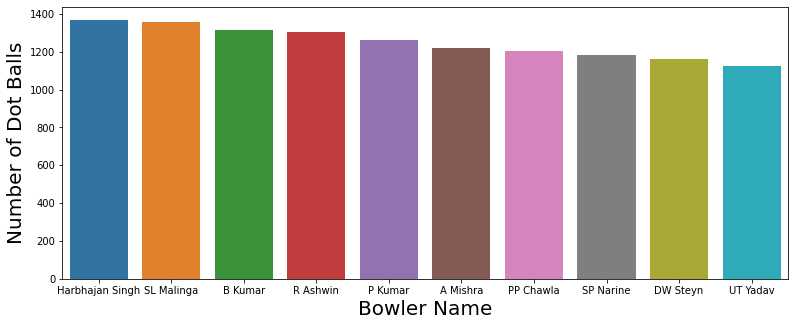

In [ ]:
plt.figure(figsize=(13,5))
sns.barplot(y=temp_df[:10],x=temp_df[:10].index)
plt.xlabel('Bowler Name',fontsize=20)
plt.ylabel('Number of Dot Balls',fontsize=20)

Most Maiden Overs by a Bowler

In [ ]:
temp_df = data.groupby(['over','bowler','date'])['batsman_runs'].sum()
temp_df = temp_df[temp_df.values == 0].droplevel(level=[0,2])
temp_df.index.value_counts()[:10]

P Kumar            17
B Kumar            13
SL Malinga         12
IK Pathan          11
DW Steyn           10
DS Kulkarni        10
Z Khan              9
Harbhajan Singh     8
Sandeep Sharma      8
I Sharma            7
Name: bowler, dtype: int64

Most No Balls by a Bowler

In [ ]:
temp_df = data[data['extras_type']=='noballs'].groupby('bowler').count()['ball'].sort_values(ascending=False)
temp_df.head(10)

bowler
S Sreesanth    23
JJ Bumrah      22
I Sharma       21
A Mishra       21
SL Malinga     18
UT Yadav       18
AB Dinda       14
JA Morkel      13
RP Singh       13
SR Watson      13
Name: ball, dtype: int64

Bowlers with best Economy (Economy = Runs conceded by the bowler/Number of Overs)

In [ ]:
Runs = pd.DataFrame(data_balls.groupby(['bowler'])['batsman_runs'].sum())
balls = pd.DataFrame(data_balls.groupby(['bowler'])['ball'].count())
df = pd.merge(left = Runs, right = balls, on='bowler', how = 'right')
df['Economy']=(df['batsman_runs']*6)/df['ball']
df=df[df['ball']>=336]
df= pd.DataFrame(df['Economy'].sort_values(ascending=True))
df.head(10)

,Economy
bowler,
Rashid Khan,6.100671
M Muralitharan,6.209258
SW Tait,6.258427
A Kumble,6.268566
DW Steyn,6.303163
DP Nannes,6.391872
RE van der Merwe,6.408791
MA Starc,6.431373
SL Malinga,6.441829


# MOST MAN OF THE MATCH AWARDS

In [ ]:
temp_df = data_matches.groupby('player_of_match').count()['date'].sort_values(ascending=False)
temp_df.head(10)

player_of_match
AB de Villiers    23
CH Gayle          22
RG Sharma         18
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         16
SK Raina          14
G Gambhir         13
V Kohli           13
Name: date, dtype: int64

Text(0, 0.5, 'Number of MoM Awards')

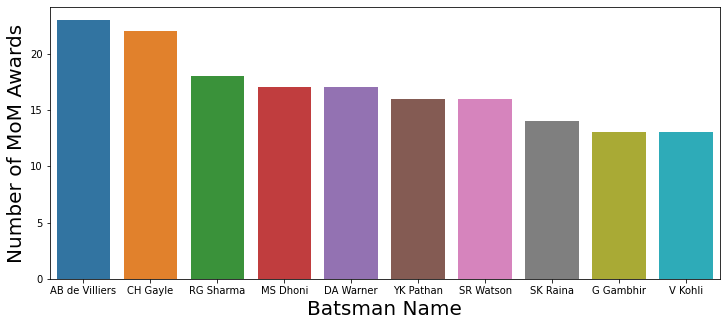

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(y=temp_df[:10],x=temp_df[:10].index)
plt.xlabel('Batsman Name',fontsize=20)
plt.ylabel('Number of MoM Awards',fontsize=20)